## Importing Basic Libraries

In [1]:
#  import the basic Libraries
import numpy as np
import pandas as pd

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for jupyter notebook widgets
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

# for Interactive Shells
from IPython.display import display

# setting up the chart size and background
plt.rcParams['figure.figsize'] = (16, 8)
plt.style.use('fivethirtyeight')

## Read the Dataset

In [2]:
#  read the dataset
data = pd.read_csv('movie_metadata.csv')

In [3]:
#  check the shape
print(data.shape)

(5043, 28)


In [4]:
#  check the column wise info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [5]:
#  remove unnecassary columns from the dataset

# Use the 'drop()' function to drop the unnecessary columns

data = data.drop(['color', 
                      'director_facebook_likes', 
                      'actor_3_facebook_likes', 
                      'actor_1_facebook_likes', 
                      'cast_total_facebook_likes', 
                      'actor_2_facebook_likes',  
                      'facenumber_in_poster', 
                      'content_rating', 
                      'country', 
                      'movie_imdb_link', 
                      'aspect_ratio',
                      'plot_keywords',
                      ], 
                       axis = 1)
data.columns

Index(['director_name', 'num_critic_for_reviews', 'duration', 'actor_2_name',
       'gross', 'genres', 'actor_1_name', 'movie_title', 'num_voted_users',
       'actor_3_name', 'num_user_for_reviews', 'language', 'budget',
       'title_year', 'imdb_score', 'movie_facebook_likes'],
      dtype='object')

## Missing Values Imputation

In [6]:
#  check the rows having high percentage of missing values in the dataset

round(100*(data.isnull().sum()/len(data.index)), 2)

director_name              2.06
num_critic_for_reviews     0.99
duration                   0.30
actor_2_name               0.26
gross                     17.53
genres                     0.00
actor_1_name               0.14
movie_title                0.00
num_voted_users            0.00
actor_3_name               0.46
num_user_for_reviews       0.42
language                   0.24
budget                     9.76
title_year                 2.14
imdb_score                 0.00
movie_facebook_likes       0.00
dtype: float64

In [7]:
# Since 'gross' and 'budget' columns have large number of NaN values, drop all the rows with NaNs at this column using the
# 'isnan' function of NumPy alongwith a negation '~'

data = data[~np.isnan(data['gross'])]
data = data[~np.isnan(data['budget'])]

# we have to remove all the rows where the leading actor's name is missing.
#data = data[~np.isnan(data['actor_1_name'])]

# Now lets again check the Missing Values column wise
data.isnull().sum()

director_name              0
num_critic_for_reviews     1
duration                   1
actor_2_name               5
gross                      0
genres                     0
actor_1_name               3
movie_title                0
num_voted_users            0
actor_3_name              10
num_user_for_reviews       0
language                   3
budget                     0
title_year                 0
imdb_score                 0
movie_facebook_likes       0
dtype: int64

In [8]:
# The rows for which the sum of Null is less than two are retained

data = data[data.isnull().sum(axis=1) <= 2]
data.isnull().sum()

director_name             0
num_critic_for_reviews    1
duration                  1
actor_2_name              2
gross                     0
genres                    0
actor_1_name              0
movie_title               0
num_voted_users           0
actor_3_name              7
num_user_for_reviews      0
language                  3
budget                    0
title_year                0
imdb_score                0
movie_facebook_likes      0
dtype: int64

In [9]:
#  impute the missing values

# using mean for numerical columns
data['num_critic_for_reviews'].fillna(data['num_critic_for_reviews'].mean(), inplace = True)
data['duration'].fillna(data['duration'].mean(), inplace = True)

# using mode for categorical column
data['language'].fillna(data['language'].mode()[0], inplace = True)

# As we know that We cannot use statistical values for imputing the missing values of actor names, so we will replace the 
# actor names with "Unknown Actor"

data['actor_2_name'].fillna('Unknown Actor', inplace = True)
data['actor_3_name'].fillna('Unknown Actor', inplace = True)

# as we imputed all the missing values lets check the no. of total missing values in the dataset
data.isnull().sum().sum()

0

## Feature Engineering

In [10]:
#  convert the gross and budget from $ to Million $ to make our analysis easier

data['gross'] = data['gross']/1000000
data['budget'] = data['budget']/1000000

In [11]:
#  create a Profit column using the Budget and Gross

data['Profit'] = data['gross'] - data['budget']

# lets also check the name of Top 10 Profitable Movies
data[['Profit','movie_title']].sort_values(by = 'Profit', ascending  = False).head(10)

,Profit,movie_title
0,523.505847,Avatar
29,502.177271,Jurassic World
26,458.672302,Titanic
3024,449.935665,Star Wars: Episode IV - A New Hope
3080,424.449459,E.T. the Extra-Terrestrial
794,403.279547,The Avengers
17,403.279547,The Avengers
509,377.783777,The Lion King
240,359.544677,Star Wars: Episode I - The Phantom Menace
66,348.316061,The Dark Knight


In [12]:
# By looking at the above result we can easily analyze that there are some duplicate

#  print the no. of rows before removing Duplicates
print("No. of Rows Before Removing Duplicates: ",data.shape[0])

# so lets remove all the duplicates from the data
data.drop_duplicates(subset = None, keep = 'first', inplace = True)

#  print the no. of rows after removing Duplicates
print("No. of Rows After Removing Duplicates: ",data.shape[0])

No. of Rows Before Removing Duplicates:  3888
No. of Rows After Removing Duplicates:  3853


In [13]:
#  check the Top 10 Profitable Movies Again

data[['movie_title','Profit']].sort_values(by = 'Profit', ascending  = False).head(10)

,movie_title,Profit
0,Avatar,523.505847
29,Jurassic World,502.177271
26,Titanic,458.672302
3024,Star Wars: Episode IV - A New Hope,449.935665
3080,E.T. the Extra-Terrestrial,424.449459
17,The Avengers,403.279547
509,The Lion King,377.783777
240,Star Wars: Episode I - The Phantom Menace,359.544677
66,The Dark Knight,348.316061
439,The Hunger Games,329.999255


In [14]:
#  check the values in the language column
data['language'].value_counts()

English       3673
French          37
Spanish         26
Mandarin        14
German          13
Japanese        12
Hindi           10
Cantonese        8
Italian          7
Portuguese       5
Korean           5
Norwegian        4
Dutch            3
Persian          3
Thai             3
Hebrew           3
Danish           3
Aboriginal       2
Dari             2
Indonesian       2
Russian          1
Romanian         1
Vietnamese       1
Arabic           1
Dzongkha         1
Zulu             1
None             1
Aramaic          1
Czech            1
Telugu           1
Icelandic        1
Filipino         1
Hungarian        1
Maya             1
Bosnian          1
Mongolian        1
Kazakh           1
Swedish          1
Name: language, dtype: int64

In [15]:


# keep only two languages that is English and Foreign
def language(x):
    if x == 'English':
        return 'English'
    else:
        return 'Foreign'

#  apply the function on the language column
data['language'] = data['language'].apply(language)

#  check the values again
data['language'].value_counts()

English    3673
Foreign     180
Name: language, dtype: int64

In [16]:

#  categorize the movies in two part i.e., short and long.

# lets define a function for categorizing Duration of Movies
def duration(x):
    if x <= 120:
        return 'Short'
    else:
        return 'Long'
    
# lets apply this function on the duration column
data['duration'] = data['duration'].apply(duration)

# lets check the values of Duration column
data['duration'].value_counts()

Short    2936
Long      917
Name: duration, dtype: int64

In [17]:
#  check the values in the Genres Column

data['genres'].value_counts()

Drama                                     153
Comedy|Drama|Romance                      151
Comedy|Drama                              147
Comedy                                    145
Comedy|Romance                            135
                                         ... 
Action|Crime|Drama|Thriller|War             1
Adventure|Comedy|Family|Musical             1
Action|Adventure|Family|Fantasy|Sci-Fi      1
Action|Drama|Mystery|Thriller|War           1
Comedy|Crime|Horror                         1
Name: genres, Length: 762, dtype: int64

In [18]:
data['genres'].str.split('|')[0]

['Action', 'Adventure', 'Fantasy', 'Sci-Fi']

In [19]:

#  movie can have so many genres so lets keep four genres

data['Moviegenres'] = data['genres'].str.split('|')
data['Genre1'] = data['Moviegenres'].apply(lambda x: x[0])

# Some of the movies have only one genre. In such cases, assign the same genre to 'genre_2' as well
data['Genre2'] = data['Moviegenres'].apply(lambda x: x[1] if len(x) > 1 else x[0])
data['Genre3'] = data['Moviegenres'].apply(lambda x: x[2] if len(x) > 2 else x[0])
data['Genre4'] = data['Moviegenres'].apply(lambda x: x[3] if len(x) > 3 else x[0])

# lets check the head of the  data
data[['genres','Genre1','Genre2','Genre3','Genre4']].head(5)

,genres,Genre1,Genre2,Genre3,Genre4
0,Action|Adventure|Fantasy|Sci-Fi,Action,Adventure,Fantasy,Sci-Fi
1,Action|Adventure|Fantasy,Action,Adventure,Fantasy,Action
2,Action|Adventure|Thriller,Action,Adventure,Thriller,Action
3,Action|Thriller,Action,Thriller,Action,Action
5,Action|Adventure|Sci-Fi,Action,Adventure,Sci-Fi,Action


## Data Visualization

   index                          movie_title  Social_Media_Popularity
0     10  Batman v Superman: Dawn of Justice               1599.794424
1    150                        Ghostbusters               1076.336425
2   1582                        Ghostbusters               1075.827482
3     96                        Interstellar               1024.560802
4   3015               10 Days in a Madhouse                828.025478
5    945                      Into the Woods                692.937200
6     73                       Suicide Squad                652.816996
7   1190                Fifty Shades of Grey                624.306881
8    108                            Warcraft                622.790277
9     92        Independence Day: Resurgence                599.274128


c:\users\moses\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


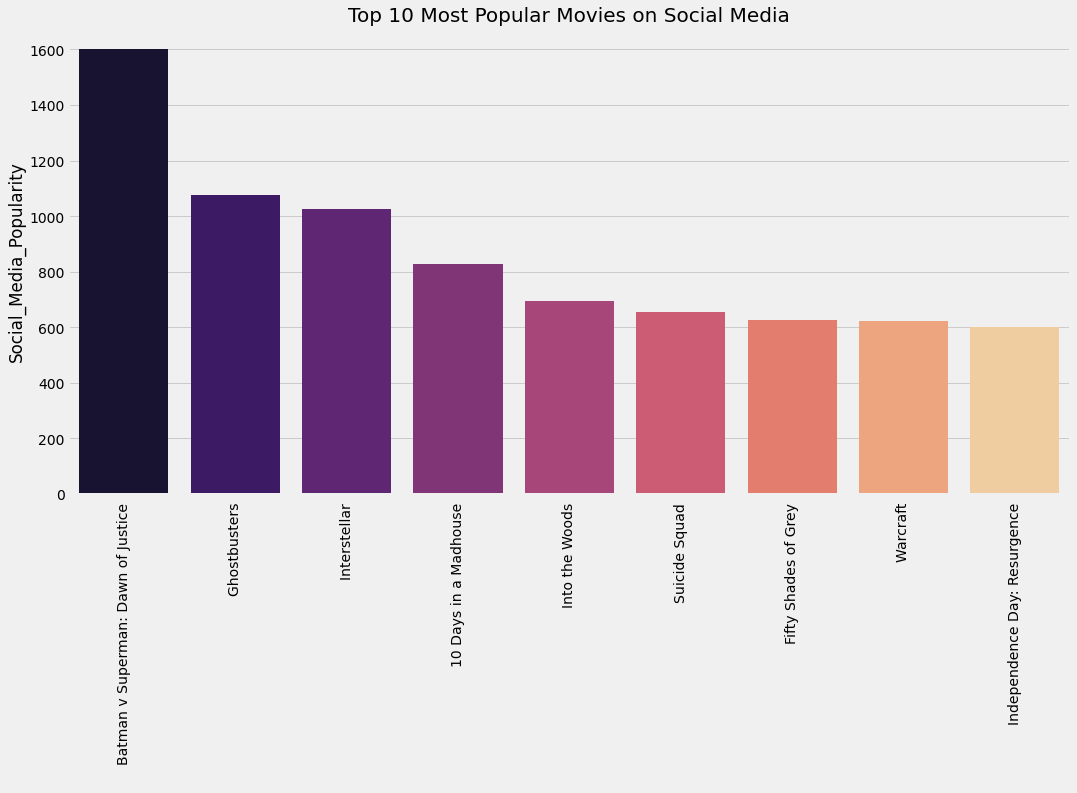

In [20]:
# calculate the Social Media Popularity of a Movie 

# to calculate popularity of a movie, we can aggregate No. of voted users, No. of Users for Reviews, and Facebook Likes.
data['Social_Media_Popularity'] = (data['num_user_for_reviews']/
                                   data['num_voted_users'])*data['movie_facebook_likes']

# lets also check the Top 10 Most Popular Movies on Social Media
x = data[['movie_title','Social_Media_Popularity']].sort_values(by = 'Social_Media_Popularity',
                                                                ascending = False).head(10).reset_index()
print(x)

sns.barplot(x['movie_title'], x['Social_Media_Popularity'], palette = 'magma')
plt.title('Top 10 Most Popular Movies on Social Media', fontsize = 20)
plt.xticks(rotation = 90, fontsize = 14)
plt.xlabel(' ')
plt.show()

In [ ]:
print("Average IMDB Score for Long Duration Movies is {0:.2f}".format(data[data['duration'] == 'Long']['imdb_score'].mean()))
print("Average IMDB Score for Short Duration Movies is {0:.2f}".format(data[data['duration'] == 'Short']['imdb_score'].mean()))

print("\nHighest Rated Long Duration Movie\n", 
    data[data['duration'] == 'Long'][['movie_title','imdb_score']].sort_values(by = 'imdb_score', ascending = False).head(1))
print("\nHighest Rated Short Duration Movie\n", 
    data[data['duration'] == 'Short'][['movie_title','imdb_score']].sort_values(by = 'imdb_score', ascending = False).head(1))

sns.boxplot(data['imdb_score'], data['duration'], palette = 'copper')
plt.title('IMDB Ratings vs Gross', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
def query_actors(x):
    a = data[data['actor_1_name'] == x]
    b = data[data['actor_2_name'] == x]
    c = data[data['actor_3_name'] == x]
    x = a.append(b)
    y = x.append(c)
    
    y = y[['movie_title',
       'budget',
       'gross',
       'title_year',
       'genres',
       'language',
       'imdb_score',
        ]]
    return y

In [ ]:
query_actors('Charlize Theron')

In [30]:
def actors_report(x):
    a = data[data['actor_1_name'] == x]
    b = data[data['actor_2_name'] == x]
    c = data[data['actor_3_name'] == x]
    x = a.append(b)
    y = x.append(c)
    print("Time:",y['title_year'].min(), y['title_year'].max())
    print("Max Gross : {0:.2f} Millions".format(y['gross'].max()))
    print("Avg Gross : {0:.2f} Millions".format(y['gross'].mean()))
    print("Min Gross : {0:.2f} Millions".format(y['gross'].min()))
    print("Number of 100 Million Movies :", y[y['gross'] > 100].shape[0])
    print("Avg IMDB Score : {0:.2f}".format(y['imdb_score'].mean()))
    print("Most Common Genres:\n",y['Genre1'].value_counts().head())
    
actors_report('Meryl Streep')

Time: 1985.0 2014.0
Max Gross : 143.70 Millions
Avg Gross : 55.23 Millions
Min Gross : 9.66 Millions
Number of 100 Million Movies : 4
Avg IMDB Score : 6.81
Most Common Genres:
 Drama        9
Comedy       7
Biography    3
Adventure    3
Action       1
Name: Genre1, dtype: int64


In [29]:
#compare Brad Pitt, Leonardo Caprio and Tom Cruise

def critically_acclaimed_actors(m):
    a = data[data['actor_1_name'] == m]
    b = data[data['actor_2_name'] == m]
    c = data[data['actor_3_name'] == m]
    x = a.append(b)
    y = x.append(c)
    return y['num_critic_for_reviews'].sum().astype('int')


print("Number of Critics Reviews for Brad Pitt")
display(critically_acclaimed_actors('Brad Pitt'))

print("Number of Critics Reviews for Leonardo DiCaprio")
display(critically_acclaimed_actors('Leonardo DiCaprio'))

print("Number of Critics Reviews for Tom Cruise")
display(critically_acclaimed_actors('Tom Cruise'))

Number of Critics Reviews for Brad Pitt


7814

Number of Critics Reviews for Leonardo DiCaprio


7014

Number of Critics Reviews for Tom Cruise


6740

In [27]:
pd.set_option('max_rows', 3000)

@interact
def show_movies_more_than(column='imdb_score', score=9.0):
    x = data.loc[data[column] > score][[ 'title_year','movie_title',
                                       'director_name',
                                       'actor_1_name',
                                       'actor_2_name',
                                       'actor_3_name',
                                       'Profit',
                                       'imdb_score',
                                    ]]
    x = x.sort_values(by = 'imdb_score', ascending = False)
    x = x.drop_duplicates(keep = 'first')
    return x

interactive(children=(Text(value='imdb_score', description='column'), FloatSlider(value=9.0, description='scor…

In [28]:
pd.set_option('max_rows', 30000)

@interact
def show_articles_more_than(column=['budget','gross'], x=1000):
    return data.loc[data[column] > x][['movie_title','duration','gross','Profit','imdb_score']]

interactive(children=(Dropdown(description='column', options=('budget', 'gross'), value='budget'), IntSlider(v…

## Recommending Movies based on Languages

In [25]:
def recommend_lang(x):
    y = data[['language','movie_title','imdb_score']][data['language'] == x]
    y = y.sort_values(by = 'imdb_score', ascending = False)
    return y.head(15)


In [26]:
recommend_lang('English')

,language,movie_title,imdb_score
1937,English,The Shawshank Redemption,9.3
3466,English,The Godfather,9.2
2837,English,The Godfather: Part II,9.0
66,English,The Dark Knight,9.0
3355,English,Pulp Fiction,8.9
1874,English,Schindler's List,8.9
339,English,The Lord of the Rings: The Return of the King,8.9
683,English,Fight Club,8.8
270,English,The Lord of the Rings: The Fellowship of the R...,8.8
2051,English,Star Wars: Episode V - The Empire Strikes Back,8.8


## Recommending Movies Based on Actors

In [23]:

def recommend_movies_on_actors(x):
    a = data[['movie_title','imdb_score']][data['actor_1_name'] == x]
    b = data[['movie_title','imdb_score']][data['actor_2_name'] == x]
    c = data[['movie_title','imdb_score']][data['actor_3_name'] == x]
    a = a.append(b)
    a = a.append(c)
    a = a.sort_values(by = 'imdb_score', ascending = False)
    return a.head(15)

In [24]:
recommend_movies_on_actors('Tom Cruise')

,movie_title,imdb_score
1868,Rain Man,8.0
75,Edge of Tomorrow,7.9
284,Minority Report,7.7
158,The Last Samurai,7.7
736,Collateral,7.6
1524,A Few Good Men,7.6
940,Interview with the Vampire: The Vampire Chroni...,7.6
155,Mission: Impossible - Ghost Protocol,7.4
135,Mission: Impossible - Rogue Nation,7.4
671,Eyes Wide Shut,7.3
